In [1]:
from hamiltonian import Hamiltonian
from var import variance_ldf, kappa_1norm
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 4 qubits
h2_jw_4 = Hamiltonian('H2_STO3g_4qubits', 'jw')
h2_parity_4 = Hamiltonian('H2_STO3g_4qubits', 'parity')
h2_bk_4 = Hamiltonian('H2_STO3g_4qubits', 'bk')

# 8 qubits
h2_jw = Hamiltonian('H2_6-31G_8qubits', 'jw')
h2_parity = Hamiltonian('H2_6-31G_8qubits', 'parity')
h2_bk = Hamiltonian('H2_6-31G_8qubits', 'bk')

# 12 qubits
lih_jw = Hamiltonian('LiH_STO3g_12qubits', 'jw')
lih_parity = Hamiltonian('LiH_STO3g_12qubits', 'parity')
lih_bk = Hamiltonian('LiH_STO3g_12qubits', 'bk')

# 14 qubits
h2o_jw = Hamiltonian('H2O_STO3g_14qubits', 'jw')
h2o_parity = Hamiltonian('H2O_STO3g_14qubits', 'parity')
h2o_bk = Hamiltonian('H2O_STO3g_14qubits', 'bk')

beh2_jw = Hamiltonian('BeH2_STO3g_14qubits', 'jw')
beh2_parity = Hamiltonian('BeH2_STO3g_14qubits', 'parity')
beh2_bk = Hamiltonian('BeH2_STO3g_14qubits', 'bk')

In [3]:
hamiltonians = {"h2_4": [h2_jw_4, h2_parity_4, h2_bk_4],
                "h2": [h2_jw, h2_parity, h2_bk],
                "lih": [lih_jw, lih_parity, lih_bk],
                "h2o": [h2o_jw, h2o_parity, h2o_bk],
                "beh2": [beh2_jw, beh2_parity, beh2_bk]}

The notebook calculates the $3*4$ data points for each molecule:
- three encodings
- 4 algorithms: ell_1, ldf, \beta_uniform, \beta_optimised_diagonal

It then plots all three data points in bar-chart style

In [4]:
betas = {}
variances = {}
for name in hamiltonians:
    betas[name] = {} # (encoding, \beta_optimised_diagonal)
    variances[name] = {} # (encoding, [ell_1, ldf, uniform, optimised])

In [5]:
def calculate_variances(name):
    b = betas[name]
    v = variances[name]
    for ham in hamiltonians[name]:        
        pr = ham.pauli_rep
        encoding = ham.encoding
        print(encoding)
        v[encoding] = [] # add to this list the 4 variances
        
        energy, state = pr.ground(multithread=True) # you can add optional keyword num_cores=15
                
        # ell_1
        var = pr.variance_ell_1(energy)
        print("\t ell 1: ", var)
        v[encoding].append(var)
    
        # LDF with 1-norm sampling
        ldf = ham.ldf()
        kappa = kappa_1norm(ldf)
        energy_tf = pr.energy_tf(energy)
        var = variance_ldf(ldf, state, kappa, energy_tf)
        print("\t ldf 1norm: ", var)
        v[encoding].append(var)
    
        # uniform
        β_uniform = pr.local_dists_uniform()
        var = pr.variance_local(energy, state, β_uniform, multithread=True)
        v[encoding].append(var)
    
        # optimal (diagonal)
        β_diag = pr.local_dists_optimal('diagonal', 'lagrange')
        print("\t optimal beta found.")
        var = pr.variance_local(energy, state, β_diag, multithread=True)
        print("\t optimal diagonal: ", var)
        v[encoding].append(var)

In [6]:
def graph_variances(name, name_title, num_qubits):
    v = variances[name]
    encodings = ['jw', 'parity', 'bk']
    
    
    ell_1_bars   = [v[encoding][0] for encoding in encodings]
    ldf_bars     = [v[encoding][1] for encoding in encodings]
    uniform_bars = [v[encoding][2] for encoding in encodings]
    optimal_bars = [v[encoding][3] for encoding in encodings]

    ind = np.arange(3) 
    width = 0.2       
    plt.bar(ind, ell_1_bars, width, label='ell_1')
    plt.bar(ind + width, ldf_bars, width, label='ldf')
    plt.bar(ind + 2*width, uniform_bars, width, label='uniform')
    plt.bar(ind + 3*width, optimal_bars, width, label='optimal')

    plt.ylabel('Variances')
    plt.title('Variances for {0} on {1} qubits'.format(name_title, num_qubits))

    plt.xticks(ind + (1.5)*width, ('Jordan-Wigner', 'Parity', 'Bravyi-Kitaev'))
    plt.legend(loc='best')    
    
    file = '../images/4algos_3encodings/{}_{}q'.format(name, num_qubits)
    #plt.savefig(file, dpi=300) # uncomment this line to save your files!
    plt.show()

In [7]:
data = {"h2_4": ["H2", 4],
        "h2": ["H2", 8],
        "lih": ["LiH", 12],
        "h2o": ["H2O", 14],
        "beh2": ["BeH2", 14]}

jw
	 ell 1:  2.493466775932127
	 ldf 1norm:  0.40181970806913836
	 optimal beta found.
	 optimal diagonal:  1.8555830498849522
parity
	 ell 1:  2.4934667759321325
	 ldf 1norm:  0.1930484777343977
	 optimal beta found.
	 optimal diagonal:  0.5410848034657949
bk
	 ell 1:  2.493466775932124
	 ldf 1norm:  0.19304847773438882
	 optimal beta found.
	 optimal diagonal:  0.5411274575466245


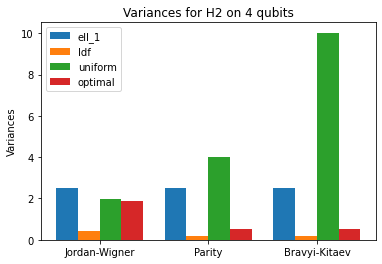

jw
	 ell 1:  119.67906001905908
	 ldf 1norm:  22.25947792299118
	 optimal beta found.
	 optimal diagonal:  17.741947811137173
parity
	 ell 1:  119.67906001905922
	 ldf 1norm:  38.007515370666155
	 optimal beta found.
	 optimal diagonal:  18.925407457204464
bk
	 ell 1:  119.6790600190594
	 ldf 1norm:  38.430662005457705
	 optimal beta found.
	 optimal diagonal:  19.517761420961207


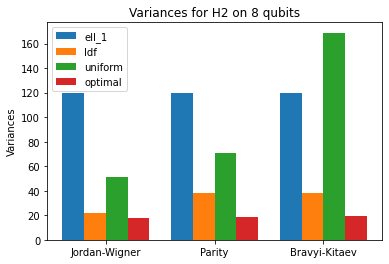

jw
	 ell 1:  138.38018090986617
	 ldf 1norm:  54.15086386372341
	 optimal beta found.
	 optimal diagonal:  14.792751908498742
parity
	 ell 1:  138.3801809098665
	 ldf 1norm:  85.77160494262657
	 optimal beta found.
	 optimal diagonal:  26.498768331254674
bk
	 ell 1:  138.38018090986878
	 ldf 1norm:  75.52780439158879
	 optimal beta found.
	 optimal diagonal:  67.99975702967883


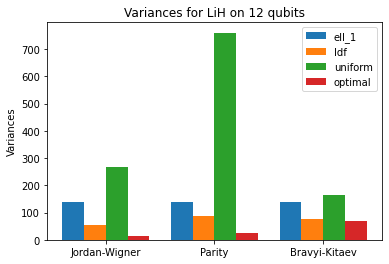

jw
	 ell 1:  4363.4977731260715
	 ldf 1norm:  1041.823501346877
	 optimal beta found.


KeyboardInterrupt: 

In [8]:
for name in data:
    name_title = data[name][0]
    num_qubits = data[name][1]
    calculate_variances(name)
    graph_variances(name, name_title, num_qubits)